# FILE I/O

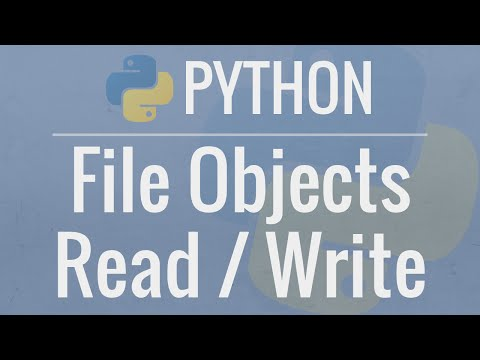

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Uh2ebFW8OYM', width=900, height=400)

File is a named location on disk to store related information. It is used to permanently store data in a non-volatile memory (e.g. hard disk).

Since, random access memory (RAM) is volatile which loses its data when computer is turned off, we use files for future use of the data.

When we want to read from or write to a file we need to open it first. When we are done, it needs to be closed, so that resources that are tied with the file are freed.

File operation:

1. Open a file

2. Read or write (perform operation)

3. Close the file

# Opening a File

Python has a built-in function open() to open a file. This function returns a file object, also called a handle, as it is used to read or modify the file accordingly.

In [0]:
f = open('example.txt') #open file in current direcotry

We can specify the mode while opening a file. In mode, we specify whether we want to read 'r', write 'w' or append 'a' to the file. We also specify if we want to open the file in text mode or binary mode.

# Python File Modes

'r' Open a file for reading. (default)

'w' Open a file for writing. Creates a new file if it does not exist or truncates the file if it exists.

'x' Open a file for exclusive creation. If the file already exists, the operation fails.

'a' Open for appending at the end of the file without truncating it. Creates a new file if it does not exist.

't' Open in text mode. (default)

'b' Open in binary mode.

'+' Open a file for updating (reading and writing)

In [0]:
f = open('example.txt') #equivalent to 'r' 
f = open('example.txt', 'r')

f = open('test.txt', 'w')

The default encoding is platform dependent. In windows, it is 'cp1252' but 'utf-8' in Linux.

So, we must not also rely on the default encoding or else our code will behave differently in different platforms.

Hence, when working with files in text mode, it is highly recommended to specify the encoding type.

# Closing a File

Closing a file will free up the resources that were tied with the file and is done using the close() method.

Python has a garbage collector to clean up unreferenced objects but, we must not rely on it to close the file.

In [0]:
f = open('example.txt')
f.close()

This method is not entirely safe. If an exception occurs when we are performing some operation with the file, the code exits without closing the file.

A safer way is to use a try...finally block.

In [0]:
try:
   f = open("example.txt")
   # perform file operations
    
finally:
   f.close()

This way, we are guaranteed that the file is properly closed even if an exception is raised, causing program flow to stop.

The best way to do this is using the with statement. This ensures that the file is closed when the block inside with is exited.

We don't need to explicitly call the close() method. It is done internally.

with open("example.txt",encoding = 'utf-8') as f:
    #perform file operations

# Writing to a File

In order to write into a file we need to open it in **write 'w', append 'a' or exclusive creation 'x' mode**.

We need to be careful with the 'w' mode as it will overwrite into the file if it already exists. All previous data are erased.

Writing a string or sequence of bytes (for binary files) is done using **write()** method. This method returns the number of characters written to the file.

In [0]:
f = open("test.txt", "w")
f.write("This is a First File\n")
f.write("Contains two lines\n")
f.close()
    
    
    

This program will create a new file named 'test.txt' if it does not exist. If it does exist, it is overwritten.



# Reading From a File

There are various methods available for this purpose. We can use the read(size) method to read in size number of data. If size parameter is not specified, it reads and returns up to the end of the file.

In [0]:
f = open("test.txt", "r")
f.read()

'This is a First File\nContains two lines\n'

In [0]:
f = open("test.txt", "r")
f.read(4)

'This'

In [0]:
#f = open("test.txt","r")
f.read(10)

' is a Firs'

We can change our current file cursor (position) using the seek() method. 

Similarly, the **tell()** method returns our current position (in number of bytes).

In [0]:
f.tell()

14

In [0]:
f.seek(0) #bring the file cursor to initial position

0

In [0]:
print(f.read()) #read the entire file

This is a First File
Contains two lines



We can read a file line-by-line using a for loop. This is both efficient and fast.

In [0]:
f.seek(0)
for line in f:
    print(line)

This is a First File

Contains two lines



Alternately, we can use readline() method to read individual lines of a file. This method reads a file till the newline, including the newline character.

In [0]:
f = open("test.txt", "r")
f.readline()

'This is a First File\n'

In [0]:
f.readline()

'Contains two lines\n'

In [0]:
f.readline()

''

The **readlines()** method returns a list of remaining lines of the entire file. All these reading method return empty values when end of file (EOF) is reached.

In [0]:
f.seek(0)
f.readlines()

['This is a First File\n', 'Contains two lines\n']

# Renaming And Deleting Files In Python.

While you were using the **read/write** functions, you may also need to **rename/delete** a file in Python. So, there comes a **os** module in Python which brings the support of file **rename/delete** operations.

So, to continue, first of all, you should import the **os** module in your Python script.

In [0]:
import os

#Rename a file from test.txt to sample.txt
os.rename("test.txt", "sample.txt")

In [0]:
f = open("sample.txt", "r")
f.readline()

'This is a First File\n'

In [0]:
#Delete a file sample.txt
os.remove("sample.txt")

In [0]:
f = open("sample.txt", "r")
f.readline()

FileNotFoundError: [Errno 2] No such file or directory: 'sample.txt'

## A context manager

In [ ]:
# with a `with 'we guarantee the closing of the file
with open("foo.txt", "w", encoding='utf-8') as sortie:
    for i in range(2):
        sortie.write(f"{i}\n")